In [1]:
#***Gaussian naive bayes는 연속형 변수일 때 적용하면 됨

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris #많이 활용되는 데이터셋들이 담겨져 있음
from sklearn.model_selection import train_test_split 
#전체 데이터에 우리가 지정해주는 비율만큼 훈련데이터와 테스트데이터를 자동으로 분류해주는 기능이였음 
#랜덤하게 데이터를 분리시켜줄 때 강사님과는 전혀 다르게 분류되어질 것임 -
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #검증데이터의 결과를 확인하기 위해 활용되는 모듈
from sklearn.metrics import accuracy_score #함수 이름만으로 접근해서 사용할 수 있게끔 추가적으로 모듈 import

np.random.seed(5) #넘파이에서 발생하는 랜덤값을 통일시킴 (데이터를 읽어올때만 적용됨) 

## iris 데이터 시각화

In [2]:
# iris 데이터 불러옴.
dataset = load_iris()

# pandas의 데이터프레임으로 데이터를 저장.
df = pd.DataFrame(dataset.data, columns=dataset.feature_names) #data필드를 호출하면 그 안에 실질적인 데이터들이 포함되어져 있음
df.head()
#꽃받침, 꽃잎의 길이와 너비로 필드로 잡혀서 출력되어지고 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target'] = dataset.target #정답데이터는 target필드에 따로 저장되어져 있음
df.head() #R에서는 종에 대한 이름이 저장되어져 있었는데 지금 현재 파이썬에서는 종의 이름을 범주화해서 제공하고 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 숫자인 분류값의 이해를 돕기 위해 문자로 변경.
df.target = df.target.map({0:'setosa', 1:'versicolor', 2:'virginica'}) 
#키값과 비교해서 지정한 데이터와 일치할 경우 value값을 넣어줌
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.target.value_counts() #각 범주군별로 몇개의 데이터가 있는지를 확인할 수 있음.

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

## iris 데이터의 분포도 확인
* 조건부 확률을 계산할 때는 데이터가 정규 분포를 이루고 있어야 함
* iris 데이터의 분포도를 확인해 보도록 하겠다. 즉, iris 데이터 분포도가 정규분포를 이루고 있는지 확인해 보기 위함.

In [6]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

<Axes: >

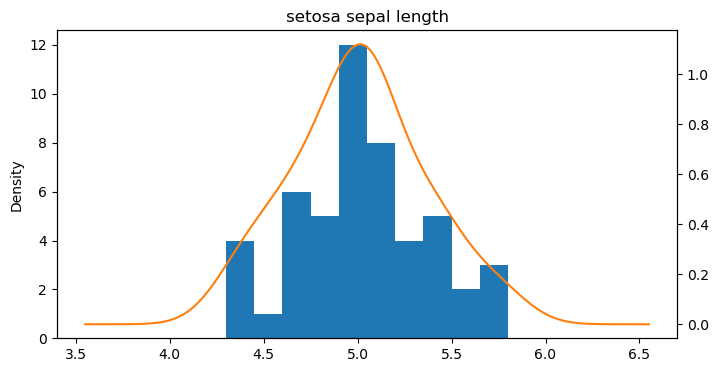

In [7]:
# sepal length 꽃받침 길이 데이터
ax = setosa_df['sepal length (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

setosa_df['sepal length (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'setosa sepal length',
                                    figsize = (8, 4)) 
#평균을 중심으로 해서 좌우가 종모양을 가지면 정규분포를 따르는 것임

<Axes: >

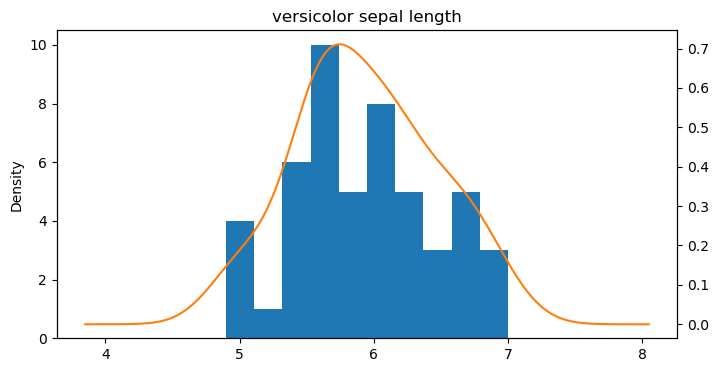

In [8]:
# sepal length 꽃받침 길이 데이터
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')

versicolor_df['sepal length (cm)'].plot(kind='kde', 
                                    ax = ax,
                                    secondary_y = True, 
                                    title = 'versicolor sepal length',
                                    figsize = (8, 4)) 
#결과를 확인하면 왼쪽으로 기울어지고 있긴 하지만 정규분포를 따르고 있음.

<Axes: >

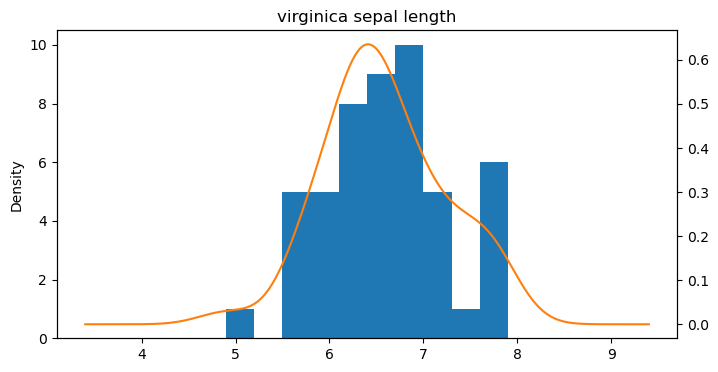

In [9]:
# sepal length 꽃받침 길이 데이터
ax = virginica_df['sepal length (cm)'].plot(kind='hist')

virginica_df['sepal length (cm)'].plot(kind='kde', 
                                    ax = ax,
                                    secondary_y = True, 
                                    title = 'virginica sepal length',
                                    figsize = (8, 4)) 
#매끄럽지 않다고 하더라도 전체적인 데이터 유형은 정규분포를 띄고 있음.

<Axes: >

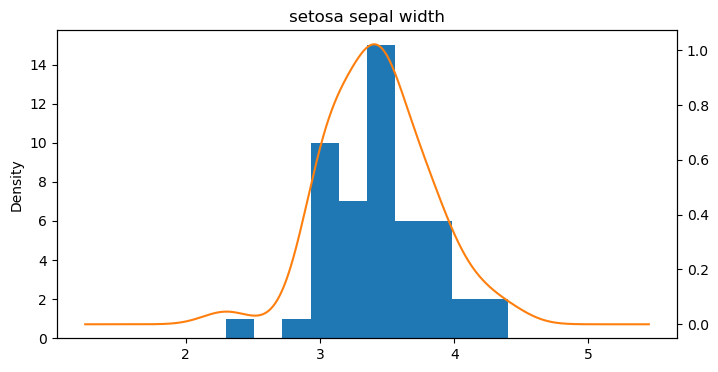

In [10]:
# sepal width(cm)
ax = setosa_df['sepal width (cm)'].plot(kind='hist')

setosa_df['sepal width (cm)'].plot(kind='kde', 
                                    ax = ax,
                                    secondary_y = True, 
                                    title = 'setosa sepal width',
                                    figsize = (8, 4)) 

<Axes: >

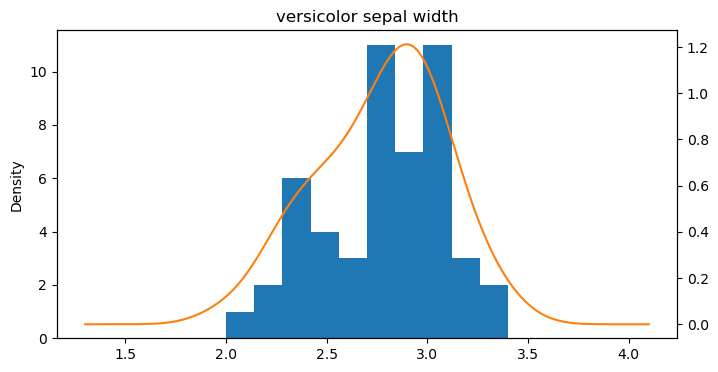

In [11]:
# sepal width(cm)
ax = versicolor_df['sepal width (cm)'].plot(kind='hist')

versicolor_df['sepal width (cm)'].plot(kind='kde', 
                                    ax = ax,
                                    secondary_y = True, 
                                    title = 'versicolor sepal width',
                                    figsize = (8, 4)) 

<Axes: >

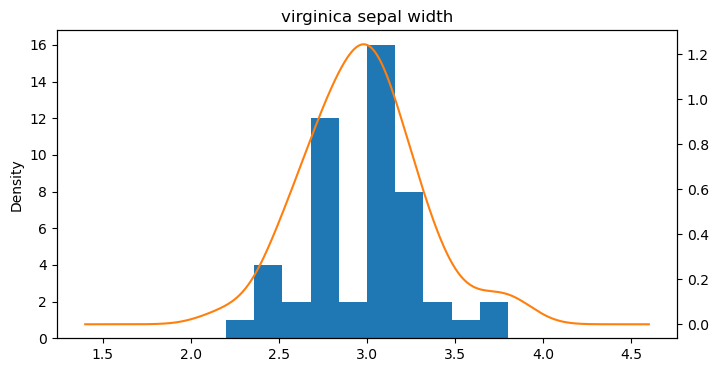

In [12]:
# sepal width(cm)
ax = virginica_df['sepal width (cm)'].plot(kind='hist')

virginica_df['sepal width (cm)'].plot(kind='kde', 
                                    ax = ax,
                                    secondary_y = True, 
                                    title = 'virginica sepal width',
                                    figsize = (8, 4)) 

<Axes: >

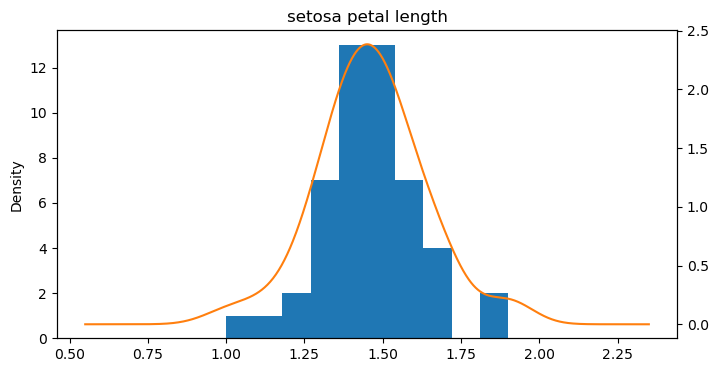

In [18]:
# setosa petal length (cm) 꽃잎길이 
ax = setosa_df['petal length (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

setosa_df['petal length (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'setosa petal length',
                                    figsize = (8, 4)) 

<Axes: >

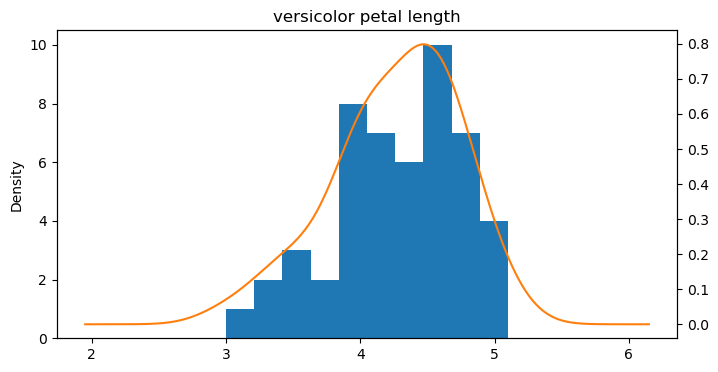

In [19]:
# versicolor petal length (cm) 
ax = versicolor_df['petal length (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

versicolor_df['petal length (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'versicolor petal length',
                                    figsize = (8, 4)) 

<Axes: >

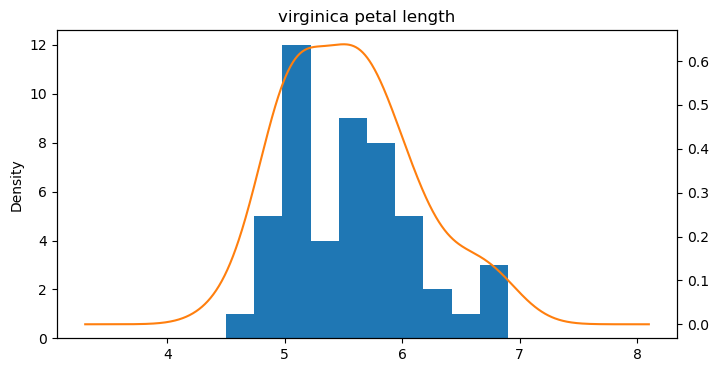

In [20]:
# virginica petal length (cm) 
ax = virginica_df['petal length (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

virginica_df['petal length (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'virginica petal length',
                                    figsize = (8, 4)) 

<Axes: >

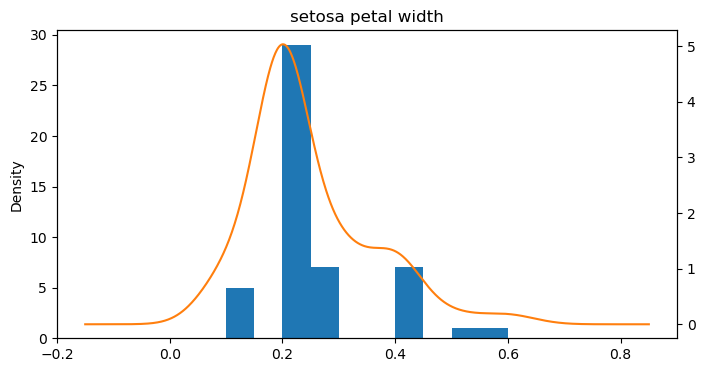

In [21]:
# setosa petal width (cm) 꽃잎너비 
ax = setosa_df['petal width (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

setosa_df['petal width (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'setosa petal width',
                                    figsize = (8, 4)) 

<Axes: >

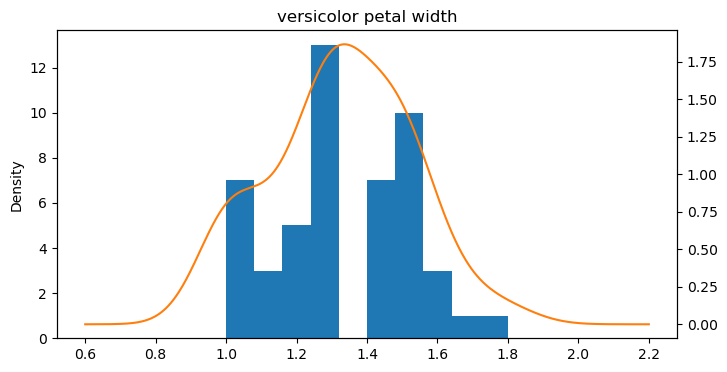

In [22]:
# versicolor petal width (cm) 
ax = versicolor_df['petal width (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

versicolor_df['petal width (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'versicolor petal width',
                                    figsize = (8, 4)) 

<Axes: >

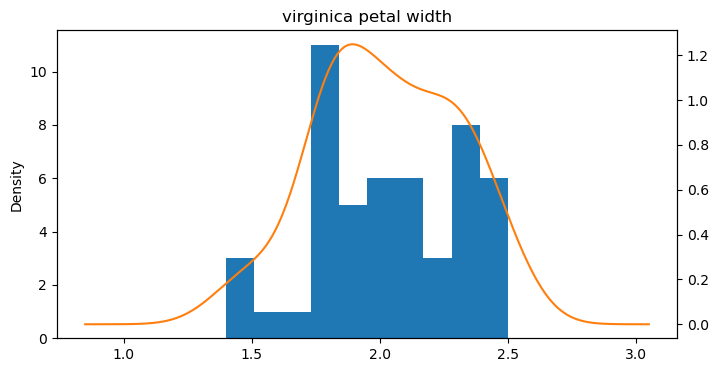

In [23]:
# virginica petal width (cm) 
ax = virginica_df['petal width (cm)'].plot(kind='hist') #막대차트로 출력하기 위해 hist지정

virginica_df['petal width (cm)'].plot(kind='kde', # 커널 밀도 추정(kernel Density Estimator) / 확률밀도로 변환해서 출력하도록 함
                                    ax = ax,
                                    secondary_y = True, #보조축 레이블을 출력할 지 여부
                                    title = 'virginica petal width',
                                    figsize = (8, 4)) 

## 데이터를 학습 데이터와 테스트 데이터로 나누기 

In [13]:
# 20%를 테스트 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)

## Gaussian Naive Bayes 분류하기

In [14]:
# 학습데이터로 모델을 학습.
model = GaussianNB() #인스턴스 생성
model.fit(X_train, y_train) #학습데이터와 학습데이터 정답을 입력으로 전달, fit이 끝날때 현데이터에 최적화된 모델이 전달될 것임

# 테스트 데이터로 모델을 테스트.
predicted = model.predict(X_test) #모델한테 예측하라고 테스트를 진행함

In [15]:
print(metrics.classification_report(y_test, predicted)) #현재 정답데이터와 예측한 데이터를 넣어서 결과를 확인하도록 함
#정확도는 90% / 각 종별로 정밀도, 재현율에 대한 확률값을 계산해서 결과를 리턴해주고 있음

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [16]:
accuracy_score(y_test, predicted) #정확도만을 계산하여 출력

0.9

## Confusion Matrix

In [17]:
print(metrics.confusion_matrix(y_test, predicted)) #판단의 결과를 범주값으로 하여 매트릭스 배열 구조로 출력해주고 있음

[[ 8  0  0]
 [ 0 10  1]
 [ 0  2  9]]


In [ ]:
#나이브 베이즈 알고리즘
#확률통계학에서 나이브베이즈가 추가되면서 기존 확률 통계를 완전히 바꾼 알고리즘임

#베이즈 이론에서부터 나오고 있음 -> 조건부 확률과 상당히 결을 같이 한다.
#확률은 모든 상황을 앞으로 일어날 가능성이 있는 사건을 확률로 계산
#조건부 확률은 A와 B의 사건에서 반드시 전제 조건은 A라는 사건이 일어난 조건 하에서 B가 일어날 확률을 구하는 것이다. 
# 전체범위를 축소시켜주는 의미임. 조건부 확률은 A사건이 일어난 조건하에라고 한다면 A의 영역만 해당하는 것이다.
# 따라서 A에 들어와 있는 B만 고려해주면 되는 것이다.
#곱사건_두 이벤트가 동시에 발생할 수도 있고, 합사건_A이거나 B로 발생
#조건부 확률: P(A | B)로 표시함 -> B사건이 일어난 조건하에서 A가 일어날 확률의 의미

#베이즈이론: P(A | B) _ 조건부 확률임.
#A가 일어난 조건하에 B가 일어난 조건의 조건부 확률을 구해서 A가 일어날 확률을 구하도록 함
#앞에 발생한 이벤트에 대한 확률을 구할 수 있는 것임
# 뒤에 확률을 계산하는 것이 상당히 까다로움. 베이지 이론을 통해 이미 전자로 발생한 확률을 구하고 그 뒤에 일어날 확률을 구하는 것은 쉬움
# 이전에 일어난 조건에 대한 확률값은 항상 주어짐.
# 이때, 일어난 확률값이 주어지면서 뒤에 이벤트가 발생이 되어질때 가정한 확률값이 얼마만큼의 정확도를 가져가는지를 보정해주는 기능을 의미한다.


#베이즈이론은 사전에 검사되어진 데이터가 있음 (샘플데이터에 대한 결과를 먼저 주어짐. 그 확률값을 가지고 추정하고자 하는 것)
#코로나 진단키트로 예시) 베이즈이론의 시작은 코로나환자가 50명, 코로나가 아닌 환자가 50명이 있음. (과거부터 지금까지의 환자가 100명)
#B가 일어났다고 할 때 A를 예측하기 힘든이유 -> 코로나 50명환자를 검사했던 진단키트의 사전 검사 정확도가 40%(20)였음. 반대는 60%(30)
#코로나에 걸리지 않은 사람의 진단키트에 대해서 테스트를 해보니 오진 확률이 30%(15)확률, 반대는 70%(35)였음
#베이즈이론에서 우리가 알고싶은 것은 내가 진단키트를 통해서 코로나라고 양성의 반응을 보였던 조건하에서 정말 코로나일 확률이 얼마가 되는지이다.
#P(코로나 확진|진단키트에 의한 양성 반응)을 구해내는 것은 어려움.

#P(B_양성 반응 보인 확률) -> 진짜 양성인 사람을 의미
#P(B|A) A가 일어난 조건_실제 코로나 확진자하에 B(양성)와 A의 교집합을 구하라. 
#상황을 역으로 추론해보고자 하는 것 -> 우리의 대상은 양성이고 베이즈이론에서는 양성만 보자는 것임.

#35분의 20 = 0.57.... => 57%
#기존에는 50%로 가정을 잡은 것이고 데이터로 계산을 하면 57% 나오고 있음.
#이 의미는 먼저 가정한 확률을 사전확률이라고 표현(P(A)를 의미)하고 그 사전확률에 이벤트가 발생한 것임 -> B(코로나 진단 키트)
#이때 사후확률이 어떻게 되느냐를 계산했을 때 57%가 나온 것이다.
#개선이 되었으면 그 개선된 57%값이 사전확률이 되는 것이다.

#*관심제외대상을 제거하면 할 수록 진실에 더 가까워진다는 것이 베이즈이론의 주장 핵심이다.
#  이 이론은 100%는 아니더라도 맞아떨어지고 있음

#데이터의 특징은 핏쳐(확률에서는 이벤트) / 타겟은 가설(추론통계에서는 가설을 먼저함)
#핏쳐에 특징에 따라서 정답이 결정되는 것이기 때문에 이벤트라고 생각하면 됨
#연역법: 일반적인 가정에서 구체적인 결론에 도달하는 증명 방법 => 확률의 접근 방법
#베이지이론은 귀납법이다. => 귀납법: 구체적인 상황들을 하나하나 관찰하면서 관찰된 내용을 통해서 결론을 추론하겠다는 것
#코로나 키트로 예시를 들었던 베이지이론은 일반 확률 값을 거꾸로 구했었음
#***베이즈 이론을 통해 구한 확률값이 가정에서 잡은 값보다 커졌다면 그 확률값을 가정으로 잡아서 업그레이드해감 -> 비확실성을 줄여가는 것


# 결합확률: 두 가지 이상의 사건이 동시에 발생할 확률 -> P(A, B) = P(A|B) P(B)
# 조건부확률이 들어가서 계산이 복잡함 이때 A와 B를 독립사건으로 보고 서로 교집합이 없다고 보면 P(B)의 값으로 보면 됨
# -> 계산을 더 빠르고 편리하게 해주게끔 나이브 베이즈의 가정인 것임
#    독립적인 사건이기 때문에 계산은 단순하게 곱셈이다.

#나이브 이론의 실습은 지금까지 이산변수로 이론을 살펴봤었음. 연속변수로도 적용이 가능함 -> 가우시안 분포도
#확률고려 -> 전체집합고려

#가우시안 나이브 베이즈에서 스무딩(smoothing)용어: 이산적인 데이터의 경우 빈도수가 0인 경우가 발생 -> 확률값 계산시 0이되어져 버림
# 내부에서는 학습데이터가 없는 데이터라고 하더라도 1을 더해서 0이 되어지지 않도록 함

#다항 분포 나이브 베이즈(제시되는 데이터가 출현되는 횟수(시행횟수)를 통해 적용), 
#베르누이 나이브 베이즈(발생표시로 주어짐_ 발생되면 1로 표시, 나오지 않으면 0으로 표시 즉, 표시용의 결과!!) => 범주형으로 표현됨 
